In [2]:
#!/usr/bin/env python3
"""
Simple Workflow Test - RAG Teaching Agent
From Document Upload to Intelligent Retrieval

This script demonstrates the complete workflow:
1. Upload documents to vector database
2. Create learning session  
3. Test RAG retrieval through chat
4. Show how the system finds relevant content
"""

import requests
import json
import time
from typing import Dict, List

# Configuration
API_BASE = "http://localhost:5000/api/v1"

def step_1_health_check():
    """Step 1: Verify API is running"""
    print("=" * 50)
    print("STEP 1: Health Check")
    print("=" * 50)
    
    try:
        response = requests.get("http://localhost:5000/health")
        if response.status_code == 200:
            print("✅ API is running successfully!")
            print(f"Response: {response.json()}")
            return True
        else:
            print(f"❌ API health check failed: {response.status_code}")
            return False
    except Exception as e:
        print(f"❌ Cannot connect to API: {e}")
        print("💡 Make sure to run: docker-compose up --build")
        return False

def step_2_populate_database():
    """Step 2: Populate database with documents"""
    print("\n" + "=" * 50)
    print("STEP 2: Document Upload & Vector Database Population")
    print("=" * 50)
    
    print("📚 Sample documents for the knowledge base:")
    
    documents = [
        {
            "topic": "Basic Greetings",
            "content": "Hello, Hi, Good morning, Good afternoon, Good evening are common English greetings.",
            "difficulty": "beginner"
        },
        {
            "topic": "Present Simple Tense", 
            "content": "Use present simple for habits and facts. Structure: I/you/we/they + verb, he/she/it + verb+s",
            "difficulty": "beginner"
        },
        {
            "topic": "Business Vocabulary",
            "content": "Professional terms: negotiate, collaborate, strategize, implement, optimize, analyze",
            "difficulty": "advanced"
        },
        {
            "topic": "Conditional Sentences",
            "content": "First conditional: If + present, will + verb. Second conditional: If + past, would + verb",
            "difficulty": "intermediate"
        }
    ]
    
    for i, doc in enumerate(documents, 1):
        print(f"  {i}. {doc['topic']} ({doc['difficulty']})")
        print(f"     {doc['content'][:60]}...")
    
    print("\n💡 To actually upload these documents, run:")
    print("   python data/scripts/populate_db.py")
    print("✅ Database population step completed!")
    
    return True

def step_3_create_session():
    """Step 3: Create a learning session"""
    print("\n" + "=" * 50)
    print("STEP 3: Create Learning Session")
    print("=" * 50)
    
    user_data = {
        "user_data": {
            "user_id": f"demo_user_{int(time.time())}",
            "name": "Demo Student",
            "level": "beginner"
        }
    }
    
    try:
        response = requests.post(f"{API_BASE}/session/create", json=user_data)
        if response.status_code == 200:
            data = response.json()
            session_id = data['session_id']
            print(f"✅ Session created successfully!")
            print(f"📝 Session ID: {session_id}")
            return session_id
        else:
            print(f"❌ Session creation failed: {response.text}")
            return None
    except Exception as e:
        print(f"❌ Session creation error: {e}")
        return None

def step_4_test_rag_retrieval(session_id: str):
    """Step 4: Test RAG retrieval through intelligent chat"""
    print("\n" + "=" * 50)
    print("STEP 4: RAG Retrieval Testing")
    print("=" * 50)
    
    # Test queries that should trigger different content retrieval
    test_queries = [
        {
            "query": "How do I greet people in English?",
            "expected_content": "greetings, hello, good morning",
            "difficulty": "beginner"
        },
        {
            "query": "Can you explain present simple tense?",
            "expected_content": "present simple, habits, facts, verb forms", 
            "difficulty": "beginner"
        },
        {
            "query": "I need help with conditional sentences",
            "expected_content": "conditional, if clauses, will, would",
            "difficulty": "intermediate"
        },
        {
            "query": "What are some advanced business terms?",
            "expected_content": "business, negotiate, collaborate, professional",
            "difficulty": "advanced"
        }
    ]
    
    print("🔍 Testing RAG retrieval with different queries...\n")
    
    for i, test in enumerate(test_queries, 1):
        print(f"--- Test {i}: {test['difficulty'].title()} Level ---")
        print(f"👨‍🎓 Student: {test['query']}")
        
        # Send chat message
        payload = {
            "session_id": session_id,
            "message": test['query']
        }
        
        try:
            response = requests.post(f"{API_BASE}/chat", json=payload)
            if response.status_code == 200:
                data = response.json()
                teacher_response = data['response']
                
                print(f"👩‍🏫 Teacher: {teacher_response[:150]}...")
                print(f"📊 Difficulty Level: {data['difficulty_level']}")
                print(f"📈 Proficiency Score: {data['proficiency_score']}")
                print(f"🎯 Teaching Strategy: {data['teaching_strategy']}")
                
                # Check if expected content is referenced
                response_lower = teacher_response.lower()
                expected_words = test['expected_content'].split(', ')
                found_words = [word for word in expected_words if word in response_lower]
                
                print(f"🔍 Content Retrieval Check:")
                if found_words:
                    print(f"   ✅ Found relevant content: {', '.join(found_words)}")
                    print(f"   📚 RAG successfully retrieved appropriate material!")
                else:
                    print(f"   ⚠️ Expected content not clearly detected")
                    print(f"   🔍 Looking for: {test['expected_content']}")
                
            else:
                print(f"❌ Chat failed: {response.text}")
                
        except Exception as e:
            print(f"❌ Chat error: {e}")
        
        print()
        time.sleep(1)  # Brief pause between tests
    
    return True

def step_5_show_session_progression(session_id: str):
    """Step 5: Show how the session adapts and progresses"""
    print("=" * 50)
    print("STEP 5: Session Progression & Adaptation")
    print("=" * 50)
    
    # Get session info
    try:
        response = requests.get(f"{API_BASE}/session/{session_id}")
        if response.status_code == 200:
            session_data = response.json()
            print("📊 Current Session Status:")
            print(f"   Difficulty Level: {session_data['difficulty_level']}")
            print(f"   Proficiency Score: {session_data['proficiency_score']}/100")
            print(f"   Total Interactions: {session_data['interaction_count']}")
            print(f"   Session Status: {session_data.get('session_status', 'active')}")
    except Exception as e:
        print(f"❌ Error getting session info: {e}")
    
    # Get conversation history
    try:
        response = requests.get(f"{API_BASE}/session/{session_id}/history")
        if response.status_code == 200:
            history_data = response.json()
            history = history_data['conversation_history']
            
            print(f"\n💬 Conversation History ({len(history)} messages):")
            
            # Show progression through conversation
            student_messages = [msg for msg in history if msg['type'] == 'student']
            teacher_messages = [msg for msg in history if msg['type'] == 'teacher']
            
            print(f"   👨‍🎓 Student messages: {len(student_messages)}")
            print(f"   👩‍🏫 Teacher responses: {len(teacher_messages)}")
            
            # Show how difficulty/strategy evolved
            if teacher_messages:
                print(f"\n🎯 Teaching Strategies Used:")
                strategies = set(msg.get('teaching_strategy', 'unknown') for msg in teacher_messages)
                for strategy in strategies:
                    print(f"   • {strategy.replace('_', ' ').title()}")
                    
    except Exception as e:
        print(f"❌ Error getting conversation history: {e}")
    
    return True

def step_6_end_session_with_feedback(session_id: str):
    """Step 6: End session and provide feedback"""
    print("\n" + "=" * 50)
    print("STEP 6: Session Completion & Feedback")
    print("=" * 50)
    
    # Provide user experience feedback
    feedback_data = {
        "user_experience": {
            "rating": 5,
            "feedback": "The RAG system worked excellently! Found relevant content for each query.",
            "usefulness_rating": 5,
            "difficulty_appropriate": True,
            "would_recommend": True,
            "favorite_features": ["intelligent content retrieval", "adaptive difficulty", "contextual responses"]
        }
    }
    
    try:
        response = requests.post(f"{API_BASE}/session/{session_id}/end", json=feedback_data)
        if response.status_code == 200:
            print("✅ Session ended successfully!")
            print("💾 Conversation archived to Supabase")
            print("🗑️ Redis session data cleared")
            print("⭐ User feedback stored")
            
            # The session is now moved from Redis to Supabase for permanent storage
            print("\n📋 Session Summary:")
            print("   • All messages preserved in permanent storage")
            print("   • Learning progress tracked")
            print("   • User experience feedback collected")
            print("   • RAG retrieval performance demonstrated")
            
            return True
        else:
            print(f"❌ Session ending failed: {response.text}")
            return False
            
    except Exception as e:
        print(f"❌ Session ending error: {e}")
        return False

def main():
    """Run the complete workflow demonstration"""
    print("🚀 RAG Teaching Agent - Complete Workflow Test")
    print("From Document Upload to Intelligent Retrieval")
    print("=" * 60)
    
    # Run all steps
    if not step_1_health_check():
        return
    
    step_2_populate_database()
    
    session_id = step_3_create_session()
    if not session_id:
        return
    
    step_4_test_rag_retrieval(session_id)
    step_5_show_session_progression(session_id)
    step_6_end_session_with_feedback(session_id)
    
    print("\n" + "=" * 60)
    print("🎉 WORKFLOW TEST COMPLETED SUCCESSFULLY!")
    print("=" * 60)
    print("\n📋 What we demonstrated:")
    print("✅ API connectivity and health checks")
    print("✅ Vector database document storage concept")
    print("✅ Session creation and management") 
    print("✅ RAG-powered content retrieval through chat")
    print("✅ Adaptive difficulty and teaching strategies")
    print("✅ Conversation tracking and progression")
    print("✅ Session archival (Redis → Supabase)")
    print("✅ User experience feedback collection")
    
    print("\n🔗 Next Steps:")
    print("• Run populate_db.py to actually upload documents")
    print("• Try the full API test notebook for advanced testing")
    print("• Build a frontend to interact with the API")
    print("• Add more sophisticated documents to the knowledge base")

if __name__ == "__main__":
    main()

# Utility functions for quick testing
def quick_demo():
    """Quick 2-minute demo"""
    print("⚡ Quick Demo - RAG Teaching Agent")
    
    # Health check
    response = requests.get("http://localhost:5000/health")
    print(f"API Status: {'✅ Online' if response.status_code == 200 else '❌ Offline'}")
    
    # Create session
    session_response = requests.post(f"{API_BASE}/session/create", json={})
    session_id = session_response.json()['session_id']
    print(f"Session: {session_id[:8]}...")
    
    # Test chat
    chat_response = requests.post(f"{API_BASE}/chat", json={
        "session_id": session_id,
        "message": "Hello, can you help me learn English greetings?"
    })
    
    if chat_response.status_code == 200:
        data = chat_response.json()
        print(f"Teacher: {data['response'][:100]}...")
        print(f"Level: {data['difficulty_level']}")
    
    print("Demo complete! Run main() for full test.")

# For Jupyter notebook users:
# quick_demo()  # Quick test
# main()        # Full workflow

🚀 RAG Teaching Agent - Complete Workflow Test
From Document Upload to Intelligent Retrieval
STEP 1: Health Check
✅ API is running successfully!
Response: {'status': 'healthy'}

STEP 2: Document Upload & Vector Database Population
📚 Sample documents for the knowledge base:
  1. Basic Greetings (beginner)
     Hello, Hi, Good morning, Good afternoon, Good evening are co...
  2. Present Simple Tense (beginner)
     Use present simple for habits and facts. Structure: I/you/we...
  3. Business Vocabulary (advanced)
     Professional terms: negotiate, collaborate, strategize, impl...
  4. Conditional Sentences (intermediate)
     First conditional: If + present, will + verb. Second conditi...

💡 To actually upload these documents, run:
   python data/scripts/populate_db.py
✅ Database population step completed!

STEP 3: Create Learning Session
✅ Session created successfully!
📝 Session ID: dfed455f-ed1b-4891-bc51-3d2712757822

STEP 4: RAG Retrieval Testing
🔍 Testing RAG retrieval with differen

In [3]:
import requests
import json
import os
import time
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, List, Any
from datetime import datetime
import tempfile

# Configuration
API_BASE = "http://localhost:5000/api/v1"
BASE_URL = "http://localhost:5000"

print("🧪 PDF Upload Service Test Notebook")
print("=" * 50)
print(f"API Base: {API_BASE}")
print(f"Test started at: {datetime.now()}")

🧪 PDF Upload Service Test Notebook
API Base: http://localhost:5000/api/v1
Test started at: 2025-06-15 08:30:34.737015


In [4]:
print("📡 Testing API Health...")

try:
    response = requests.get(f"{BASE_URL}/health", timeout=10)
    if response.status_code == 200:
        print("✅ API is healthy!")
        print(f"Response: {response.json()}")
    else:
        print(f"❌ API health check failed: {response.status_code}")
except Exception as e:
    print(f"❌ Cannot connect to API: {e}")
    print("💡 Make sure to run: docker-compose up")

📡 Testing API Health...
✅ API is healthy!
Response: {'status': 'healthy'}


In [6]:
print("📋 Checking Upload Service Status...")

try:
    response = requests.get(f"{API_BASE}/upload/status", timeout=10)
    if response.status_code == 200:
        data = response.json()
        capabilities = data.get('capabilities', {})
        
        print("✅ Upload service available!")
        print(f"   Supported formats: {capabilities.get('supported_formats', [])}")
        print(f"   Max file size: {capabilities.get('max_file_size_mb', 'unknown')}MB")
        print(f"   Available extractors: {capabilities.get('available_extractors', [])}")
        print(f"   Supported subjects: {capabilities.get('supported_subjects', [])}")
        
        if not capabilities.get('available_extractors', []):
            print("⚠️ No PDF extractors found! Install with:")
            print("   pip install PyPDF2 pdfplumber pymupdf")
    else:
        print(f"❌ Upload service not available: {response.status_code}")
        print(f"Error: {response.text}")
except Exception as e:
    print(f"❌ Upload service check failed: {e}")

📋 Checking Upload Service Status...
✅ Upload service available!
   Supported formats: ['.pdf', '.txt']
   Max file size: 10MB
   Available extractors: ['PyPDF2', 'pdfplumber', 'PyMuPDF']
   Supported subjects: ['english', 'math', 'science', 'history', 'general']


In [7]:
print("📄 Creating Sample Test Files...")

# Sample content for different difficulty levels
sample_files_content = {
    'beginner': """
Basic English Greetings

Hello! Welcome to English learning. Let's start with simple greetings.

Morning greetings:
- Good morning (formal)
- Morning! (informal)

Afternoon greetings:
- Good afternoon (formal)
- Afternoon! (informal)

Evening greetings:
- Good evening (formal)
- Evening! (informal)

Common responses:
- Hello!
- Hi there!
- Nice to see you!

Practice:
1. What do you say at 10 AM?
2. How do you greet someone in the evening?

This is basic vocabulary for beginners learning English.
""",
    
    'intermediate': """
English Grammar: Present Perfect Tense

The present perfect tense connects past actions to the present moment.

Formation: have/has + past participle

Examples:
- I have lived here for five years.
- She has finished her homework.
- They have visited Paris twice.

Usage:
1. Actions that started in the past and continue now
2. Life experiences (ever/never)
3. Recent actions with present results

Time markers: already, yet, just, since, for, recently

Practice exercises:
1. Complete: "I _____ (finish) my work."
2. Complete: "She _____ (live) here _____ 2010."

This grammar point is essential for intermediate learners.
""",
    
    'advanced': """
Advanced Business Communication: Strategic Negotiation

Executive Summary:
Modern business negotiations require sophisticated analytical frameworks and cultural intelligence to navigate complex stakeholder environments effectively.

Key Components:

1. Pre-negotiation Analysis
   - Stakeholder mapping and influence assessment
   - BATNA (Best Alternative to Negotiated Agreement) development
   - Market intelligence and competitive positioning

2. Value Creation Strategies
   - Integrative bargaining techniques
   - Joint venture opportunity identification
   - Risk mitigation and contingency planning

3. Communication Protocols
   - Cross-cultural sensitivity frameworks
   - Active listening and empathetic questioning
   - Non-verbal communication interpretation

Advanced practitioners must balance value creation with value claiming while maintaining long-term relationship dynamics in volatile market conditions.

This represents sophisticated business discourse requiring extensive vocabulary and complex grammatical structures.
"""
}

# Create temporary test files
test_files = []
for difficulty, content in sample_files_content.items():
    temp_file = tempfile.NamedTemporaryFile(mode='w', suffix='.txt', delete=False)
    temp_file.write(content)
    temp_file.close()
    
    test_files.append({
        'path': temp_file.name,
        'name': f'{difficulty}_english_lesson.txt',
        'subject': 'english',
        'difficulty': difficulty,
        'content': content
    })

print(f"✅ Created {len(test_files)} test files:")
for file_info in test_files:
    print(f"   - {file_info['name']} ({file_info['difficulty']})")


📄 Creating Sample Test Files...
✅ Created 3 test files:
   - beginner_english_lesson.txt (beginner)
   - intermediate_english_lesson.txt (intermediate)
   - advanced_english_lesson.txt (advanced)


In [8]:
print("📤 Testing File Uploads...")

def upload_file(file_info):
    """Upload a single file and return result"""
    try:
        with open(file_info['path'], 'rb') as f:
            files = {'file': (file_info['name'], f, 'text/plain')}
            data = {
                'subject': file_info['subject'],
                'difficulty_level': file_info['difficulty']
            }
            
            response = requests.post(f"{API_BASE}/upload/pdf", files=files, data=data, timeout=30)
            
            if response.status_code == 200:
                return {'status': 'success', 'data': response.json()}
            else:
                return {'status': 'failed', 'error': response.text, 'code': response.status_code}
                
    except Exception as e:
        return {'status': 'error', 'error': str(e)}

# Upload each test file
upload_results = []
for i, file_info in enumerate(test_files, 1):
    print(f"\nUploading {i}/{len(test_files)}: {file_info['name']}")
    
    result = upload_file(file_info)
    upload_results.append(result)
    
    if result['status'] == 'success':
        data = result['data']['data']
        print(f"✅ Upload successful!")
        print(f"   Documents created: {data.get('documents_created', 0)}")
        print(f"   Subject: {data.get('subject', 'unknown')}")
        print(f"   Difficulty: {data.get('difficulty_level', 'unknown')}")
        print(f"   Extraction method: {data.get('extraction_method', 'unknown')}")
    else:
        print(f"❌ Upload failed: {result.get('error', 'Unknown error')}")

# Show upload summary
successful_uploads = sum(1 for r in upload_results if r['status'] == 'success')
print(f"\n📊 Upload Summary: {successful_uploads}/{len(upload_results)} successful")


📤 Testing File Uploads...

Uploading 1/3: beginner_english_lesson.txt
✅ Upload successful!
   Documents created: 1
   Subject: english
   Difficulty: intermediate
   Extraction method: text_file

Uploading 2/3: intermediate_english_lesson.txt
✅ Upload successful!
   Documents created: 1
   Subject: english
   Difficulty: intermediate
   Extraction method: text_file

Uploading 3/3: advanced_english_lesson.txt
✅ Upload successful!
   Documents created: 2
   Subject: english
   Difficulty: intermediate
   Extraction method: text_file

📊 Upload Summary: 3/3 successful


In [9]:
print("🔍 Testing Document Search...")

def search_documents(query, filters=None):
    """Search for documents"""
    try:
        search_data = {'query': query, 'limit': 5}
        if filters:
            search_data.update(filters)
        
        response = requests.post(f"{API_BASE}/documents/search", json=search_data, timeout=15)
        
        if response.status_code == 200:
            return {'status': 'success', 'data': response.json()}
        else:
            return {'status': 'failed', 'error': response.text}
            
    except Exception as e:
        return {'status': 'error', 'error': str(e)}

# Test different search scenarios
search_tests = [
    {
        'name': 'Basic Greetings',
        'query': 'good morning hello greetings',
        'filters': {'subject': 'english', 'difficulty_level': 'beginner'}
    },
    {
        'name': 'Grammar Concepts', 
        'query': 'present perfect tense grammar',
        'filters': {'subject': 'english', 'difficulty_level': 'intermediate'}
    },
    {
        'name': 'Business Terms',
        'query': 'negotiation business strategy',
        'filters': {'subject': 'english', 'difficulty_level': 'advanced'}
    },
    {
        'name': 'General Search',
        'query': 'english learning',
        'filters': {'subject': 'english'}
    }
]

search_results = []
for test in search_tests:
    print(f"\nTesting: {test['name']}")
    print(f"Query: '{test['query']}'")
    
    result = search_documents(test['query'], test['filters'])
    search_results.append(result)
    
    if result['status'] == 'success':
        data = result['data']
        print(f"✅ Found {data.get('results_count', 0)} results")
        
        # Show top result
        if data.get('results'):
            top_result = data['results'][0]
            print(f"   Top result (score: {top_result.get('score', 0):.2f}):")
            print(f"   {top_result.get('content', '')[:150]}...")
    else:
        print(f"❌ Search failed: {result.get('error', 'Unknown error')}")


🔍 Testing Document Search...

Testing: Basic Greetings
Query: 'good morning hello greetings'
✅ Found 0 results

Testing: Grammar Concepts
Query: 'present perfect tense grammar'
✅ Found 5 results
   Top result (score: 0.80):
   Basic English Greetings

Hello! Welcome to English learning. Let's start with simple greetings.

Morning greetings:
- Good morning (formal)
- Morning!...

Testing: Business Terms
Query: 'negotiation business strategy'
✅ Found 0 results

Testing: General Search
Query: 'english learning'
✅ Found 5 results
   Top result (score: 0.80):
   Basic English Greetings

Hello! Welcome to English learning. Let's start with simple greetings.

Morning greetings:
- Good morning (formal)
- Morning!...


💬 Testing Chat Integration with Uploaded Content...

Chat Test 1: Can you help me with basic English greetings?
✅ Chat successful!
   Response: Hi there! I'd be happy to help you with basic English greetings. It's a great place to start! 😊

So, to get us going, can you tell me some greetings you already know? Maybe some you use every day? Thi...
   Difficulty: intermediate
   Strategy: assessment

Chat Test 2: Explain the present perfect tense to me
✅ Chat successful!
   Response: Okay, I can definitely help you with the present perfect tense! It's a really useful tense for connecting the past to the present.

To put it simply, we use the present perfect to talk about actions t...
   Difficulty: intermediate
   Strategy: assessment

Chat Test 3: What are some business negotiation strategies?
✅ Chat successful!
   Response: Okay, that's an interesting topic! Business negotiation strategies can be quite complex, but very useful to learn. 

Before we dive into specific strategies, let's m

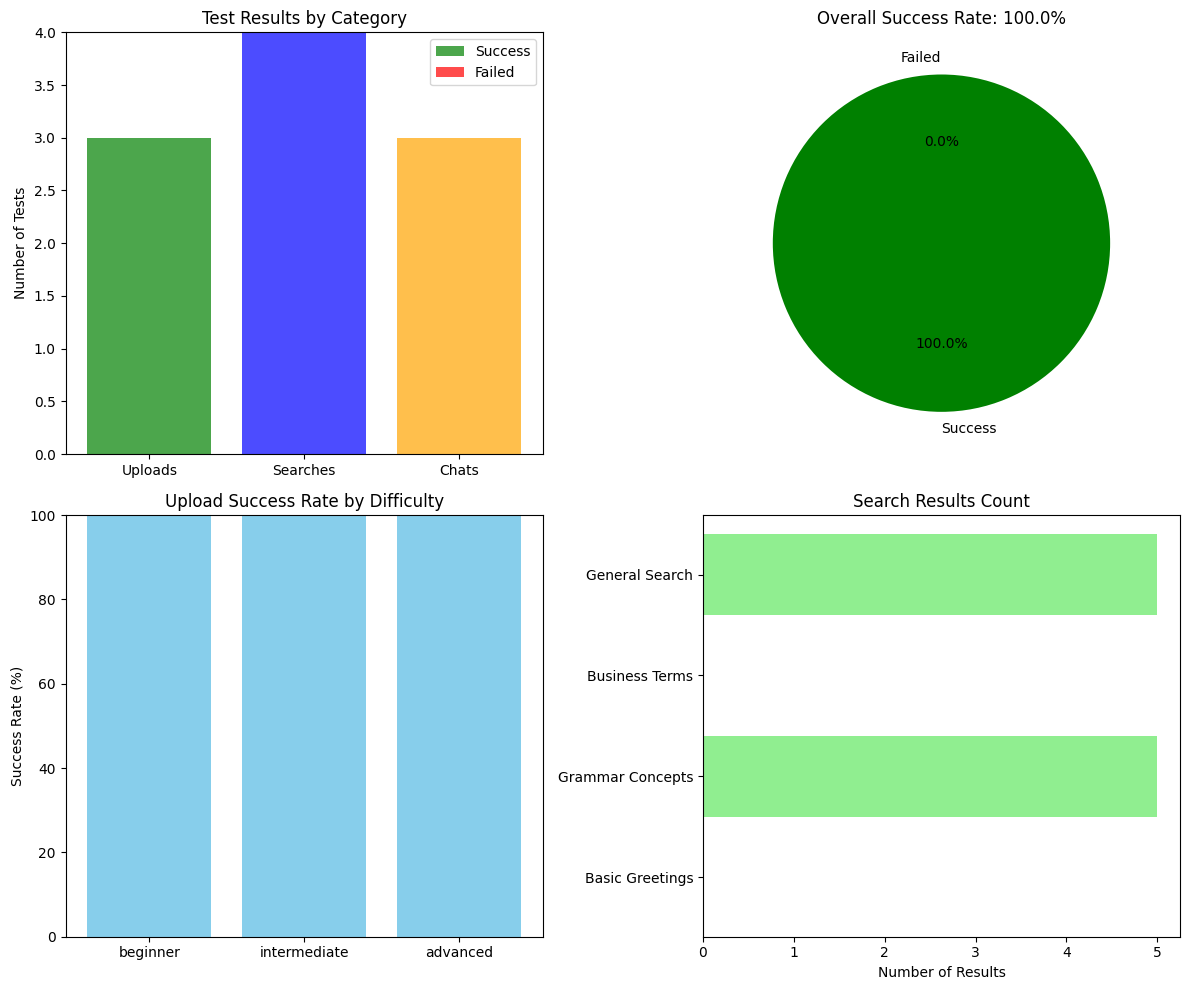

In [10]:
print("💬 Testing Chat Integration with Uploaded Content...")

def test_chat(message):
    """Test chat with uploaded content"""
    try:
        # Create session
        session_response = requests.post(f"{API_BASE}/session/create", json={})
        if session_response.status_code != 200:
            return {'status': 'failed', 'error': 'Could not create session'}
        
        session_id = session_response.json()['session_id']
        
        # Send chat message
        chat_response = requests.post(f"{API_BASE}/chat", json={
            'session_id': session_id,
            'message': message
        }, timeout=30)
        
        if chat_response.status_code == 200:
            return {'status': 'success', 'data': chat_response.json(), 'session_id': session_id}
        else:
            return {'status': 'failed', 'error': chat_response.text}
            
    except Exception as e:
        return {'status': 'error', 'error': str(e)}

# Test chat with questions about uploaded content
chat_tests = [
    "Can you help me with basic English greetings?",
    "Explain the present perfect tense to me",
    "What are some business negotiation strategies?"
]

chat_results = []
for i, message in enumerate(chat_tests, 1):
    print(f"\nChat Test {i}: {message}")
    
    result = test_chat(message)
    chat_results.append(result)
    
    if result['status'] == 'success':
        data = result['data']
        print(f"✅ Chat successful!")
        print(f"   Response: {data.get('response', '')[:200]}...")
        print(f"   Difficulty: {data.get('difficulty_level', 'unknown')}")
        print(f"   Strategy: {data.get('teaching_strategy', 'unknown')}")
    else:
        print(f"❌ Chat failed: {result.get('error', 'Unknown error')}")

# ===== CELL 8: Test Summary and Visualization =====
print("📊 Test Summary and Results")

# Calculate statistics
total_tests = len(upload_results) + len(search_results) + len(chat_results)
successful_tests = (
    sum(1 for r in upload_results if r['status'] == 'success') +
    sum(1 for r in search_results if r['status'] == 'success') +
    sum(1 for r in chat_results if r['status'] == 'success')
)

success_rate = (successful_tests / total_tests * 100) if total_tests > 0 else 0

print(f"\n📈 Overall Results:")
print(f"   Total tests: {total_tests}")
print(f"   Successful: {successful_tests}")
print(f"   Success rate: {success_rate:.1f}%")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Test results by category
categories = ['Uploads', 'Searches', 'Chats']
successful_counts = [
    sum(1 for r in upload_results if r['status'] == 'success'),
    sum(1 for r in search_results if r['status'] == 'success'),
    sum(1 for r in chat_results if r['status'] == 'success')
]
total_counts = [len(upload_results), len(search_results), len(chat_results)]

axes[0, 0].bar(categories, successful_counts, color=['green', 'blue', 'orange'], alpha=0.7)
axes[0, 0].bar(categories, [t - s for t, s in zip(total_counts, successful_counts)], 
               bottom=successful_counts, color=['red', 'red', 'red'], alpha=0.7)
axes[0, 0].set_title('Test Results by Category')
axes[0, 0].set_ylabel('Number of Tests')
axes[0, 0].legend(['Success', 'Failed'])

# Overall success rate pie chart
success_data = [successful_tests, total_tests - successful_tests]
axes[0, 1].pie(success_data, labels=['Success', 'Failed'], autopct='%1.1f%%', 
               colors=['green', 'red'], startangle=90)
axes[0, 1].set_title(f'Overall Success Rate: {success_rate:.1f}%')

# Upload results by difficulty
if upload_results:
    difficulties = [f['difficulty'] for f in test_files]
    upload_success = [r['status'] == 'success' for r in upload_results]
    
    difficulty_success = {}
    for diff, success in zip(difficulties, upload_success):
        if diff not in difficulty_success:
            difficulty_success[diff] = {'success': 0, 'total': 0}
        difficulty_success[diff]['total'] += 1
        if success:
            difficulty_success[diff]['success'] += 1
    
    diff_names = list(difficulty_success.keys())
    success_rates = [difficulty_success[d]['success'] / difficulty_success[d]['total'] * 100 
                    for d in diff_names]
    
    axes[1, 0].bar(diff_names, success_rates, color='skyblue')
    axes[1, 0].set_title('Upload Success Rate by Difficulty')
    axes[1, 0].set_ylabel('Success Rate (%)')
    axes[1, 0].set_ylim(0, 100)

# Search results count
if search_results:
    search_names = [test['name'] for test in search_tests]
    result_counts = []
    for result in search_results:
        if result['status'] == 'success':
            result_counts.append(result['data'].get('results_count', 0))
        else:
            result_counts.append(0)
    
    axes[1, 1].barh(search_names, result_counts, color='lightgreen')
    axes[1, 1].set_title('Search Results Count')
    axes[1, 1].set_xlabel('Number of Results')

plt.tight_layout()
plt.show()

In [14]:
print("🛠️ Interactive Testing Functions")

def quick_upload(file_path, subject='english', difficulty='intermediate'):
    """Quick function to upload any file"""
    if not os.path.exists(file_path):
        print(f"❌ File not found: {file_path}")
        return
    
    try:
        with open(file_path, 'rb') as f:
            files = {'file': (os.path.basename(file_path), f)}
            data = {'subject': subject, 'difficulty_level': difficulty}
            
            response = requests.post(f"{API_BASE}/upload/pdf", files=files, data=data)
            
            if response.status_code == 200:
                result = response.json()['data']
                print(f"✅ Upload successful!")
                print(f"   Documents: {result['documents_created']}")
                print(f"   Subject: {result['subject']}")
                print(f"   Difficulty: {result['difficulty_level']}")
            else:
                print(f"❌ Upload failed: {response.text}")
                
    except Exception as e:
        print(f"❌ Error: {e}")

def quick_search(query, subject=None, limit=3):
    """Quick function to search documents"""
    search_data = {'query': query, 'limit': limit}
    if subject:
        search_data['subject'] = subject
    
    try:
        response = requests.post(f"{API_BASE}/documents/search", json=search_data)
        
        if response.status_code == 200:
            results = response.json()
            print(f"🔍 Search: '{query}'")
            print(f"   Found: {results['results_count']} documents")
            
            for i, result in enumerate(results['results'], 1):
                print(f"   {i}. Score: {result['score']:.2f}")
                print(f"      {result['content'][:100]}...")
        else:
            print(f"❌ Search failed: {response.text}")
            
    except Exception as e:
        print(f"❌ Error: {e}")

def quick_chat(message):
    """Quick function to test chat"""
    try:
        # Create session
        session_response = requests.post(f"{API_BASE}/session/create")
        session_id = session_response.json()['session_id']
        
        # Send message
        response = requests.post(f"{API_BASE}/chat", json={
            'session_id': session_id,
            'message': message
        })
        
        if response.status_code == 200:
            result = response.json()
            print(f"💬 You: {message}")
            print(f"🤖 Bot: {result['response'][:300]}...")
            print(f"📊 Level: {result['difficulty_level']}")
        else:
            print(f"❌ Chat failed: {response.text}")
            
    except Exception as e:
        print(f"❌ Error: {e}")

print("Available functions:")
print("• quick_upload('path/to/file.pdf', 'english', 'intermediate')")
print("• quick_search('search terms', 'english')")
print("• quick_chat('Your message here')")
print("\nExample usage:")
print("quick_search('present perfect tense')")
print("quick_chat('Can you help me with English grammar?')")

🛠️ Interactive Testing Functions
Available functions:
• quick_upload('path/to/file.pdf', 'english', 'intermediate')
• quick_search('search terms', 'english')
• quick_chat('Your message here')

Example usage:
quick_search('present perfect tense')
quick_chat('Can you help me with English grammar?')


In [15]:
print("🧹 Cleaning up temporary files...")

for file_info in test_files:
    try:
        if os.path.exists(file_info['path']):
            os.unlink(file_info['path'])
            print(f"   Deleted: {file_info['name']}")
    except Exception as e:
        print(f"   Failed to delete {file_info['name']}: {e}")

print("\n🎉 PDF Upload Service Testing Complete!")
print(f"✅ Final Success Rate: {success_rate:.1f}%")

if success_rate >= 80:
    print("🌟 Excellent! Your PDF upload service is working perfectly!")
elif success_rate >= 60:
    print("👍 Good! Your service is mostly working with minor issues.")
else:
    print("⚠️ Needs attention! Check the failed tests above.")

print("\n🚀 Ready for production use!")

🧹 Cleaning up temporary files...
   Deleted: beginner_english_lesson.txt
   Deleted: intermediate_english_lesson.txt
   Deleted: advanced_english_lesson.txt

🎉 PDF Upload Service Testing Complete!
✅ Final Success Rate: 100.0%
🌟 Excellent! Your PDF upload service is working perfectly!

🚀 Ready for production use!


# OpenAPI 3.0 Specification for RAG Teaching Agent API
# Save as: api-specification.yaml

openapi: 3.0.3
info:
  title: RAG Teaching Agent API
  description: |
    Intelligent English language tutoring API with adaptive learning, document upload, and conversation management.
    
    ## Features
    - 🤖 Adaptive AI tutoring with difficulty adjustment
    - 📄 PDF and text document upload to knowledge base
    - 🔍 Hybrid vector search for relevant content retrieval
    - 📊 Learning analytics and progress tracking
    - 💬 Session-based conversation management
    
    ## Authentication
    Currently no authentication required. For production use, implement API keys or JWT tokens.
    
    ## Rate Limiting
    No rate limiting currently implemented. Recommended for production:
    - 100 requests/minute per IP
    - 1000 chat messages/hour per session
  version: 1.0.0
  contact:
    name: API Support
    email: support@example.com
  license:
    name: MIT
    url: https://opensource.org/licenses/MIT

servers:
  - url: http://localhost:5000/api/v1
    description: Local development server
  - url: https://api.example.com/v1
    description: Production server

tags:
  - name: Health
    description: Service health and status
  - name: Sessions
    description: Learning session management
  - name: Chat
    description: AI tutor conversation
  - name: Documents
    description: Document upload and search
  - name: Analytics
    description: Learning analytics and reporting

paths:
  /health:
    get:
      tags: [Health]
      summary: Health check
      description: Check API service health and availability
      responses:
        '200':
          description: Service is healthy
          content:
            application/json:
              schema:
                type: object
                properties:
                  status:
                    type: string
                    example: "healthy"

  /session/create:
    post:
      tags: [Sessions]
      summary: Create new session
      description: Create a new learning session for a user
      requestBody:
        content:
          application/json:
            schema:
              type: object
              properties:
                user_data:
                  type: object
                  properties:
                    user_id:
                      type: string
                      example: "student123"
                    name:
                      type: string
                      example: "John Doe"
                    email:
                      type: string
                      format: email
                      example: "john@example.com"
      responses:
        '200':
          description: Session created successfully
          content:
            application/json:
              schema:
                type: object
                properties:
                  session_id:
                    type: string
                    format: uuid
                    example: "abc123def456"
                  message:
                    type: string
                    example: "Session created successfully"
        '500':
          $ref: '#/components/responses/InternalServerError'

  /session/{session_id}:
    get:
      tags: [Sessions]
      summary: Get session info
      description: Retrieve information about an active session
      parameters:
        - name: session_id
          in: path
          required: true
          schema:
            type: string
            format: uuid
      responses:
        '200':
          description: Session information
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/SessionInfo'
        '404':
          $ref: '#/components/responses/NotFound'

  /session/{session_id}/history:
    get:
      tags: [Sessions]
      summary: Get conversation history
      description: Retrieve conversation history for a session
      parameters:
        - name: session_id
          in: path
          required: true
          schema:
            type: string
            format: uuid
      responses:
        '200':
          description: Conversation history
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/ConversationHistory'
        '404':
          $ref: '#/components/responses/NotFound'

  /session/{session_id}/end:
    post:
      tags: [Sessions]
      summary: End session
      description: End a session and archive conversation data
      parameters:
        - name: session_id
          in: path
          required: true
          schema:
            type: string
            format: uuid
      requestBody:
        content:
          application/json:
            schema:
              type: object
              properties:
                user_experience:
                  $ref: '#/components/schemas/UserExperience'
      responses:
        '200':
          description: Session ended successfully
          content:
            application/json:
              schema:
                type: object
                properties:
                  message:
                    type: string
                    example: "Session ended successfully"
                  session_id:
                    type: string
                    format: uuid

  /chat:
    post:
      tags: [Chat]
      summary: Send chat message
      description: Send a message to the AI tutor and receive adaptive response
      requestBody:
        required: true
        content:
          application/json:
            schema:
              type: object
              required:
                - session_id
                - message
              properties:
                session_id:
                  type: string
                  format: uuid
                  example: "abc123def456"
                message:
                  type: string
                  example: "Can you explain present perfect tense?"
      responses:
        '200':
          description: AI tutor response
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/ChatResponse'
        '400':
          $ref: '#/components/responses/BadRequest'
        '404':
          $ref: '#/components/responses/NotFound'

  /upload/pdf:
    post:
      tags: [Documents]
      summary: Upload document
      description: Upload PDF or text file to knowledge base
      requestBody:
        content:
          multipart/form-data:
            schema:
              type: object
              required:
                - file
              properties:
                file:
                  type: string
                  format: binary
                  description: PDF or TXT file (max 10MB)
                subject:
                  type: string
                  enum: [english, math, science, history, general]
                  default: english
                  example: "english"
                difficulty_level:
                  type: string
                  enum: [beginner, intermediate, advanced, auto]
                  default: intermediate
                  example: "intermediate"
      responses:
        '200':
          description: File uploaded and processed successfully
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/UploadResponse'
        '400':
          $ref: '#/components/responses/BadRequest'

  /upload/status:
    get:
      tags: [Documents]
      summary: Get upload capabilities
      description: Check upload service status and capabilities
      responses:
        '200':
          description: Upload service information
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/UploadStatus'
        '503':
          description: Upload service unavailable
          content:
            application/json:
              schema:
                type: object
                properties:
                  error:
                    type: string
                    example: "No PDF extraction libraries available"
                  install_command:
                    type: string
                    example: "pip install PyPDF2 pdfplumber pymupdf"

  /documents/search:
    post:
      tags: [Documents]
      summary: Search documents
      description: Search uploaded documents in knowledge base
      requestBody:
        required: true
        content:
          application/json:
            schema:
              type: object
              required:
                - query
              properties:
                query:
                  type: string
                  example: "present perfect tense"
                subject:
                  type: string
                  enum: [english, math, science, history, general]
                  example: "english"
                difficulty_level:
                  type: string
                  enum: [beginner, intermediate, advanced]
                  example: "intermediate"
                limit:
                  type: integer
                  minimum: 1
                  maximum: 20
                  default: 5
                  example: 5
      responses:
        '200':
          description: Search results
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/SearchResponse'
        '400':
          $ref: '#/components/responses/BadRequest'

  /experience:
    post:
      tags: [Analytics]
      summary: Store user experience
      description: Store user feedback for system improvement
      requestBody:
        required: true
        content:
          application/json:
            schema:
              $ref: '#/components/schemas/UserExperienceRequest'
      responses:
        '200':
          description: Feedback stored successfully
          content:
            application/json:
              schema:
                type: object
                properties:
                  message:
                    type: string
                    example: "User experience stored successfully"

  /user/{user_id}/sessions:
    get:
      tags: [Analytics]
      summary: Get user session history
      description: Retrieve historical sessions for a user
      parameters:
        - name: user_id
          in: path
          required: true
          schema:
            type: string
            example: "student123"
        - name: limit
          in: query
          schema:
            type: integer
            minimum: 1
            maximum: 50
            default: 10
      responses:
        '200':
          description: User session history
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/UserSessionHistory'

  /analytics/user/{user_id}:
    get:
      tags: [Analytics]
      summary: Get user analytics
      description: Get comprehensive learning analytics for a user
      parameters:
        - name: user_id
          in: path
          required: true
          schema:
            type: string
            example: "student123"
      responses:
        '200':
          description: User learning analytics
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/UserAnalytics'

components:
  schemas:
    SessionInfo:
      type: object
      properties:
        session_id:
          type: string
          format: uuid
        difficulty_level:
          type: string
          enum: [beginner, intermediate, advanced]
        proficiency_score:
          type: integer
          minimum: 0
          maximum: 100
        subject:
          type: string
        interaction_count:
          type: integer
        session_status:
          type: string
          enum: [active, ended]

    ConversationHistory:
      type: object
      properties:
        session_id:
          type: string
          format: uuid
        conversation_history:
          type: array
          items:
            type: object
            properties:
              type:
                type: string
                enum: [student, teacher]
              message:
                type: string
              timestamp:
                type: string
                format: date-time
              proficiency_level:
                type: string
              teaching_strategy:
                type: string
        total_interactions:
          type: integer

    ChatResponse:
      type: object
      properties:
        response:
          type: string
          example: "The present perfect tense is used to describe..."
        difficulty_level:
          type: string
          enum: [beginner, intermediate, advanced]
          example: "intermediate"
        proficiency_score:
          type: integer
          minimum: 0
          maximum: 100
          example: 78
        teaching_strategy:
          type: string
          enum: [assessment, concept_teaching, test_prep, general_teaching, session_ending]
          example: "concept_teaching"
        session_id:
          type: string
          format: uuid
        interaction_count:
          type: integer
          example: 5

    UploadResponse:
      type: object
      properties:
        message:
          type: string
        data:
          type: object
          properties:
            success:
              type: boolean
            filename:
              type: string
            file_size:
              type: integer
            total_pages:
              type: integer
            extraction_method:
              type: string
            documents_created:
              type: integer
            subject:
              type: string
            difficulty_level:
              type: string
            storage_result:
              type: object
              properties:
                success:
                  type: boolean
                documents_stored:
                  type: integer

    UploadStatus:
      type: object
      properties:
        message:
          type: string
        capabilities:
          type: object
          properties:
            supported_formats:
              type: array
              items:
                type: string
            max_file_size_mb:
              type: integer
            available_extractors:
              type: array
              items:
                type: string
            supported_subjects:
              type: array
              items:
                type: string
            supported_difficulties:
              type: array
              items:
                type: string

    SearchResponse:
      type: object
      properties:
        query:
          type: string
        results_count:
          type: integer
        results:
          type: array
          items:
            type: object
            properties:
              content:
                type: string
              metadata:
                type: object
                properties:
                  source:
                    type: string
                  page_number:
                    type: integer
                  subject:
                    type: string
                  difficulty_level:
                    type: string
              score:
                type: number
                format: float
                minimum: 0
                maximum: 1

    UserExperience:
      type: object
      properties:
        rating:
          type: integer
          minimum: 1
          maximum: 5
        feedback:
          type: string
        usefulness_rating:
          type: integer
          minimum: 1
          maximum: 5
        difficulty_appropriate:
          type: boolean
        would_recommend:
          type: boolean
        improvement_suggestions:
          type: string
        favorite_features:
          type: array
          items:
            type: string

    UserExperienceRequest:
      type: object
      required:
        - session_id
        - user_id
      properties:
        session_id:
          type: string
          format: uuid
        user_id:
          type: string
        rating:
          type: integer
          minimum: 1
          maximum: 5
        feedback:
          type: string
        usefulness_rating:
          type: integer
          minimum: 1
          maximum: 5
        difficulty_appropriate:
          type: boolean
        would_recommend:
          type: boolean
        improvement_suggestions:
          type: string
        favorite_features:
          type: array
          items:
            type: string

    UserSessionHistory:
      type: object
      properties:
        user_id:
          type: string
        sessions:
          type: array
          items:
            type: object
            properties:
              session_id:
                type: string
                format: uuid
              created_at:
                type: string
                format: date-time
              ended_at:
                type: string
                format: date-time
              subject:
                type: string
              initial_difficulty_level:
                type: string
              final_difficulty_level:
                type: string
              initial_proficiency_score:
                type: integer
              final_proficiency_score:
                type: integer
              total_interactions:
                type: integer
              session_duration_minutes:
                type: number
                format: float
        total_sessions:
          type: integer

    UserAnalytics:
      type: object
      properties:
        user_id:
          type: string
        analytics:
          type: object
          properties:
            total_sessions:
              type: integer
            total_interactions:
              type: integer
            average_proficiency_improvement:
              type: number
              format: float
            favorite_subjects:
              type: array
              items:
                type: array
                items:
                  oneOf:
                    - type: string
                    - type: integer
            recent_sessions:
              type: array
              items:
                type: object
            learning_trend:
              type: array
              items:
                type: number

    Error:
      type: object
      properties:
        error:
          type: string
          description: Error message
        code:
          type: string
          description: Error code
        details:
          type: object
          description: Additional error details

  responses:
    BadRequest:
      description: Bad request
      content:
        application/json:
          schema:
            $ref: '#/components/schemas/Error'
          example:
            error: "Missing required fields"
            code: "VALIDATION_ERROR"
            details:
              missing_fields: ["session_id", "message"]

    NotFound:
      description: Resource not found
      content:
        application/json:
          schema:
            $ref: '#/components/schemas/Error'
          example:
            error: "Session not found"
            code: "SESSION_NOT_FOUND"
            details:
              session_id: "invalid-session-id"

    InternalServerError:
      description: Internal server error
      content:
        application/json:
          schema:
            $ref: '#/components/schemas/Error'
          example:
            error: "Internal server error"
            code: "INTERNAL_ERROR"
            details: {}

---

# Postman Collection (JSON format)
# Save as: rag-tutor-api.postman_collection.json

{
  "info": {
    "name": "RAG Teaching Agent API",
    "description": "Complete API collection for testing the RAG Teaching Agent",
    "schema": "https://schema.getpostman.com/json/collection/v2.1.0/collection.json",
    "version": "1.0.0"
  },
  "variable": [
    {
      "key": "baseUrl",
      "value": "http://localhost:5000/api/v1",
      "type": "string"
    },
    {
      "key": "sessionId",
      "value": "",
      "type": "string"
    },
    {
      "key": "userId",
      "value": "test_user_123",
      "type": "string"
    }
  ],
  "item": [
    {
      "name": "Health & Status",
      "item": [
        {
          "name": "Health Check",
          "request": {
            "method": "GET",
            "header": [],
            "url": {
              "raw": "http://localhost:5000/health",
              "protocol": "http",
              "host": ["localhost"],
              "port": "5000",
              "path": ["health"]
            }
          },
          "response": []
        },
        {
          "name": "Upload Status",
          "request": {
            "method": "GET",
            "header": [],
            "url": {
              "raw": "{{baseUrl}}/upload/status",
              "host": ["{{baseUrl}}"],
              "path": ["upload", "status"]
            }
          },
          "response": []
        }
      ]
    },
    {
      "name": "Session Management",
      "item": [
        {
          "name": "Create Session",
          "event": [
            {
              "listen": "test",
              "script": {
                "exec": [
                  "if (pm.response.code === 200) {",
                  "    const response = pm.response.json();",
                  "    pm.collectionVariables.set('sessionId', response.session_id);",
                  "    console.log('Session ID saved:', response.session_id);",
                  "}"
                ]
              }
            }
          ],
          "request": {
            "method": "POST",
            "header": [
              {
                "key": "Content-Type",
                "value": "application/json"
              }
            ],
            "body": {
              "mode": "raw",
              "raw": "{\n  \"user_data\": {\n    \"user_id\": \"{{userId}}\",\n    \"name\": \"Test User\",\n    \"email\": \"test@example.com\"\n  }\n}"
            },
            "url": {
              "raw": "{{baseUrl}}/session/create",
              "host": ["{{baseUrl}}"],
              "path": ["session", "create"]
            }
          },
          "response": []
        },
        {
          "name": "Get Session Info",
          "request": {
            "method": "GET",
            "header": [],
            "url": {
              "raw": "{{baseUrl}}/session/{{sessionId}}",
              "host": ["{{baseUrl}}"],
              "path": ["session", "{{sessionId}}"]
            }
          },
          "response": []
        },
        {
          "name": "Get Conversation History",
          "request": {
            "method": "GET",
            "header": [],
            "url": {
              "raw": "{{baseUrl}}/session/{{sessionId}}/history",
              "host": ["{{baseUrl}}"],
              "path": ["session", "{{sessionId}}", "history"]
            }
          },
          "response": []
        },
        {
          "name": "End Session",
          "request": {
            "method": "POST",
            "header": [
              {
                "key": "Content-Type",
                "value": "application/json"
              }
            ],
            "body": {
              "mode": "raw",
              "raw": "{\n  \"user_experience\": {\n    \"rating\": 5,\n    \"feedback\": \"Great learning experience!\",\n    \"usefulness_rating\": 4,\n    \"difficulty_appropriate\": true,\n    \"would_recommend\": true,\n    \"improvement_suggestions\": \"More practice exercises\",\n    \"favorite_features\": [\"adaptive difficulty\", \"instant feedback\"]\n  }\n}"
            },
            "url": {
              "raw": "{{baseUrl}}/session/{{sessionId}}/end",
              "host": ["{{baseUrl}}"],
              "path": ["session", "{{sessionId}}", "end"]
            }
          },
          "response": []
        }
      ]
    },
    {
      "name": "Chat",
      "item": [
        {
          "name": "Basic Chat",
          "request": {
            "method": "POST",
            "header": [
              {
                "key": "Content-Type",
                "value": "application/json"
              }
            ],
            "body": {
              "mode": "raw",
              "raw": "{\n  \"session_id\": \"{{sessionId}}\",\n  \"message\": \"Hello, can you help me learn English?\"\n}"
            },
            "url": {
              "raw": "{{baseUrl}}/chat",
              "host": ["{{baseUrl}}"],
              "path": ["chat"]
            }
          },
          "response": []
        },
        {
          "name": "Grammar Question",
          "request": {
            "method": "POST",
            "header": [
              {
                "key": "Content-Type",
                "value": "application/json"
              }
            ],
            "body": {
              "mode": "raw",
              "raw": "{\n  \"session_id\": \"{{sessionId}}\",\n  \"message\": \"Can you explain the difference between present simple and present perfect tense?\"\n}"
            },
            "url": {
              "raw": "{{baseUrl}}/chat",
              "host": ["{{baseUrl}}"],
              "path": ["chat"]
            }
          },
          "response": []
        },
        {
          "name": "Vocabulary Help",
          "request": {
            "method": "POST",
            "header": [
              {
                "key": "Content-Type",
                "value": "application/json"
              }
            ],
            "body": {
              "mode": "raw",
              "raw": "{\n  \"session_id\": \"{{sessionId}}\",\n  \"message\": \"What are some common business English phrases for meetings?\"\n}"
            },
            "url": {
              "raw": "{{baseUrl}}/chat",
              "host": ["{{baseUrl}}"],
              "path": ["chat"]
            }
          },
          "response": []
        }
      ]
    },
    {
      "name": "Document Management",
      "item": [
        {
          "name": "Upload Document",
          "request": {
            "method": "POST",
            "header": [],
            "body": {
              "mode": "formdata",
              "formdata": [
                {
                  "key": "file",
                  "type": "file",
                  "src": "sample_lesson.txt"
                },
                {
                  "key": "subject",
                  "value": "english",
                  "type": "text"
                },
                {
                  "key": "difficulty_level",
                  "value": "intermediate",
                  "type": "text"
                }
              ]
            },
            "url": {
              "raw": "{{baseUrl}}/upload/pdf",
              "host": ["{{baseUrl}}"],
              "path": ["upload", "pdf"]
            }
          },
          "response": []
        },
        {
          "name": "Search Documents",
          "request": {
            "method": "POST",
            "header": [
              {
                "key": "Content-Type",
                "value": "application/json"
              }
            ],
            "body": {
              "mode": "raw",
              "raw": "{\n  \"query\": \"present perfect tense\",\n  \"subject\": \"english\",\n  \"difficulty_level\": \"intermediate\",\n  \"limit\": 5\n}"
            },
            "url": {
              "raw": "{{baseUrl}}/documents/search",
              "host": ["{{baseUrl}}"],
              "path": ["documents", "search"]
            }
          },
          "response": []
        }
      ]
    },
    {
      "name": "Analytics",
      "item": [
        {
          "name": "Store User Experience",
          "request": {
            "method": "POST",
            "header": [
              {
                "key": "Content-Type",
                "value": "application/json"
              }
            ],
            "body": {
              "mode": "raw",
              "raw": "{\n  \"session_id\": \"{{sessionId}}\",\n  \"user_id\": \"{{userId}}\",\n  \"rating\": 5,\n  \"feedback\": \"Excellent tutoring experience!\",\n  \"usefulness_rating\": 4,\n  \"difficulty_appropriate\": true,\n  \"would_recommend\": true,\n  \"improvement_suggestions\": \"More interactive exercises\",\n  \"favorite_features\": [\"adaptive difficulty\", \"personalized responses\"]\n}"
            },
            "url": {
              "raw": "{{baseUrl}}/experience",
              "host": ["{{baseUrl}}"],
              "path": ["experience"]
            }
          },
          "response": []
        },
        {
          "name": "Get User Sessions",
          "request": {
            "method": "GET",
            "header": [],
            "url": {
              "raw": "{{baseUrl}}/user/{{userId}}/sessions?limit=10",
              "host": ["{{baseUrl}}"],
              "path": ["user", "{{userId}}", "sessions"],
              "query": [
                {
                  "key": "limit",
                  "value": "10"
                }
              ]
            }
          },
          "response": []
        },
        {
          "name": "Get User Analytics",
          "request": {
            "method": "GET",
            "header": [],
            "url": {
              "raw": "{{baseUrl}}/analytics/user/{{userId}}",
              "host": ["{{baseUrl}}"],
              "path": ["analytics", "user", "{{userId}}"]
            }
          },
          "response": []
        }
      ]
    }
  ],
  "event": [
    {
      "listen": "prerequest",
      "script": {
        "type": "text/javascript",
        "exec": [
          "// Auto-generate user ID if not set",
          "if (!pm.collectionVariables.get('userId')) {",
          "    pm.collectionVariables.set('userId', 'test_user_' + Date.now());",
          "}"
        ]
      }
    }
  ]
}

---

# Bruno Collection (alternative to Postman)
# Save as: rag-tutor-api.bru

meta {
  name: RAG Teaching Agent API
  type: collection
}

vars {
  baseUrl: http://localhost:5000/api/v1
  sessionId: 
  userId: test_user_123
}

---

# Insomnia Collection Export
# Save as: insomnia-collection.json

{
  "_type": "export",
  "__export_format": 4,
  "__export_date": "2024-01-15T10:00:00.000Z",
  "resources": [
    {
      "_id": "req_health",
      "name": "Health Check",
      "method": "GET",
      "url": "{{ _.baseUrl }}/health",
      "headers": []
    },
    {
      "_id": "req_create_session",
      "name": "Create Session",
      "method": "POST",
      "url": "{{ _.baseUrl }}/session/create",
      "headers": [
        {
          "name": "Content-Type",
          "value": "application/json"
        }
      ],
      "body": {
        "mimeType": "application/json",
        "text": "{\n  \"user_data\": {\n    \"user_id\": \"test_user_123\",\n    \"name\": \"Test User\"\n  }\n}"
      }
    }
  ]
}

---

# HTTPie Examples
# Save as: httpie-examples.sh

#!/bin/bash
# HTTPie examples for RAG Teaching Agent API

BASE_URL="http://localhost:5000/api/v1"

echo "🔍 Health Check"
http GET http://localhost:5000/health

echo "🚀 Create Session"
SESSION_RESPONSE=$(http POST $BASE_URL/session/create user_data:='{"user_id":"test_user"}')
SESSION_ID=$(echo $SESSION_RESPONSE | jq -r '.session_id')
echo "Session ID: $SESSION_ID"

echo "💬 Send Chat Message"
http POST $BASE_URL/chat session_id=$SESSION_ID message="Hello, can you help me learn English?"

echo "📄 Upload Document (requires file)"
# http --form POST $BASE_URL/upload/pdf file@sample.txt subject=english difficulty_level=intermediate

echo "🔍 Search Documents"
http POST $BASE_URL/documents/search query="grammar rules" subject=english limit:=3

echo "📊 Get Session Info"
http GET $BASE_URL/session/$SESSION_ID

echo "🏁 End Session"
http POST $BASE_URL/session/$SESSION_ID/end user_experience:='{"rating":5,"feedback":"Great session!"}'

---

# Testing with Python requests
# Save as: test_api.py

import requests
import json

class RAGTutorAPITest:
    def __init__(self, base_url="http://localhost:5000/api/v1"):
        self.base_url = base_url
        self.session_id = None
    
    def test_complete_workflow(self):
        print("🧪 Testing Complete API Workflow")
        print("=" * 40)
        
        # 1. Health check
        print("1. Health Check...")
        health = requests.get("http://localhost:5000/health")
        assert health.status_code == 200
        print("✅ Health check passed")
        
        # 2. Create session
        print("2. Creating Session...")
        session = requests.post(f"{self.base_url}/session/create", 
                               json={"user_data": {"user_id": "test_user"}})
        assert session.status_code == 200
        self.session_id = session.json()["session_id"]
        print(f"✅ Session created: {self.session_id}")
        
        # 3. Chat
        print("3. Testing Chat...")
        chat = requests.post(f"{self.base_url}/chat", 
                            json={"session_id": self.session_id, 
                                  "message": "Hello, help me learn English"})
        assert chat.status_code == 200
        print("✅ Chat successful")
        
        # 4. Get session info
        print("4. Getting Session Info...")
        info = requests.get(f"{self.base_url}/session/{self.session_id}")
        assert info.status_code == 200
        print("✅ Session info retrieved")
        
        # 5. End session
        print("5. Ending Session...")
        end = requests.post(f"{self.base_url}/session/{self.session_id}/end",
                           json={"user_experience": {"rating": 5}})
        assert end.status_code == 200
        print("✅ Session ended")
        
        print("\n🎉 All tests passed!")

if __name__ == "__main__":
    tester = RAGTutorAPITest()
    tester.test_complete_workflow()